# MathAData - Module introduction à l'IA

## Classification des images de 2 et de 7
Dans ce Notebook, nous allons construire un algorithme permettant de reconnaître des images de 2 et de 7.

In [1]:
import utilitaires.utilitaires_common
from utilitaires.utilitaires_intro import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Chargement de la base de donnée d'images en cours...
Images chargées !


Error during http request
HTTPConnectionPool(host='localhost', port=3000): Max retries exceeded with url: /api/notebooks/session (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f3aa3469640>: Failed to establish a new connection: [Errno 111] Connection refused'))
Error during http request
HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /api/participants/challenges/116/highscore?capytale_id=-1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f3aa3469dc0>: Failed to establish a new connection: [Errno 111] Connection refused'))


## 1. Image numérique

#### Une image en niveaux de gris : tableau 2D de pixels  
Une image en niveau de gris est un tableau deux dimensions. Chaque pixel de l'image correspond à un élément du tableau. Chaque élément est un entier compris entre 0 et 255, du plus foncé au plus clair, donc 0 pour noir et 255 pour blanc.  
Les images dans ce TP font $28 \times 28$ pixels.

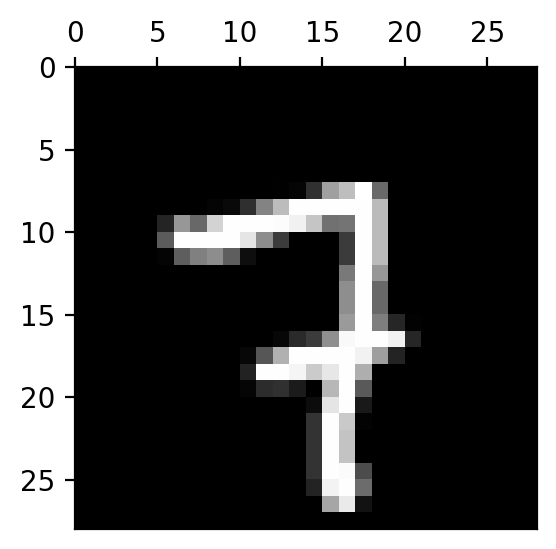

In [2]:
# Affichage de l'image
affichage(d)

In [3]:
# Les valeurs qui sont derrières l'image
affichage_tableau(d)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,1,5,49,160,190,255,106,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,4,9,47,131,188,254,254,254,254,254,187,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,37,151,104,211,254,254,254,252,241,197,113,116,254,187,0,0,0,0,0,0,0,0,0


In [4]:
# La valeur du pixel (17,15) est 254
pixel = 254
# On transforme ce pixel en pixel noir
d[17,15] = 0

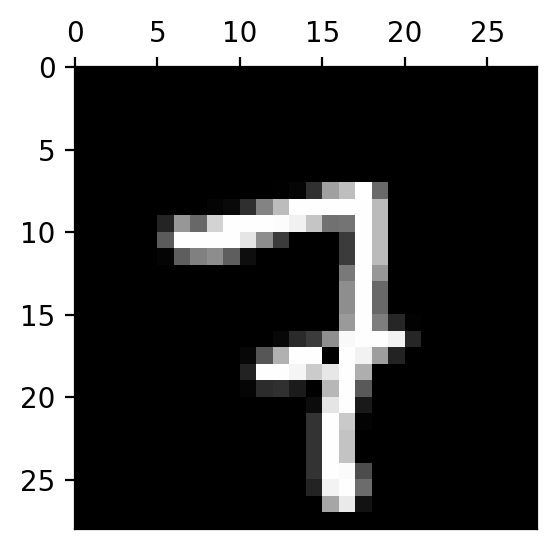

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,1,5,49,160,190,255,106,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,4,9,47,131,188,254,254,254,254,254,187,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,37,151,104,211,254,254,254,252,241,197,113,116,254,187,0,0,0,0,0,0,0,0,0


In [5]:
# Le pixel à bien été modifié
affichage(d)
affichage_tableau(d,(17,15))

## 2. Classification des chiffres 2 et 7
Objectif : Déterminer si une image d représente un 2 ou un 7

### Ensemble des images d'entraînement
La variable d_train contient plus de 12 000 images $d$ de 2 et de 7. On connaît pour ces images leur classe 2 ou 7 notée $r$.

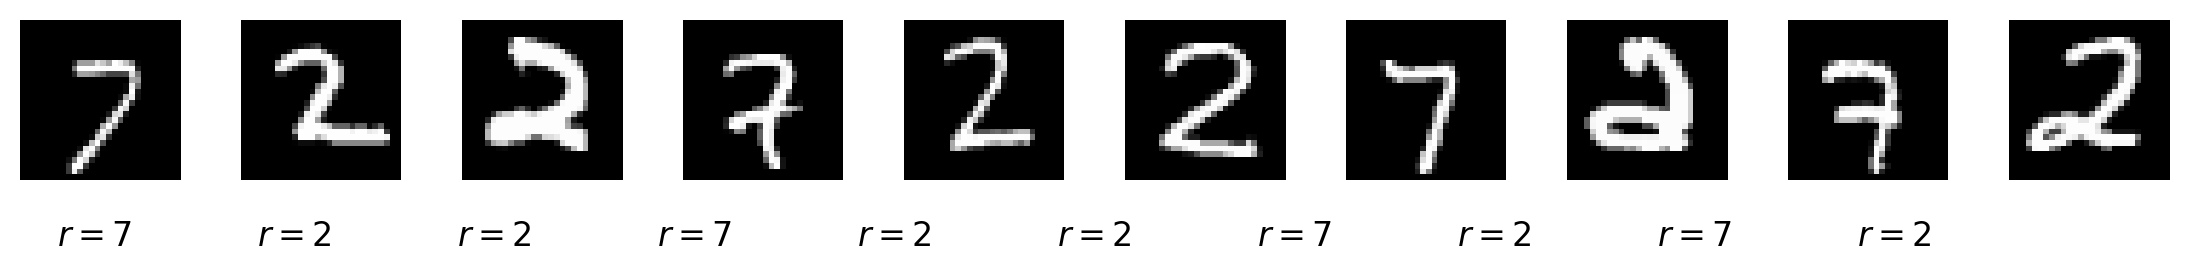

In [6]:
# Visualisation des 10 premières images
affichage_dix(d_train)

### La caractéristique d'une image
La caractéristique notée $k$ est un nombre calculé à partir des valeurs des pixels d'une image $d$. Le but de la caractéristique est de résumer 784 pixels en un seul nombre qui nous permet de différencier les 2 et les 7.
On cherche donc à avoir une caractéristique qui sera la plus différente possible pour les 2 et pour les 7.

![/image_mnist/caracteristique.png](attachment:caracteristique.png)

Nous allons utiliser la moyenne de l'image comme première caractéristique. Pour la calculer, on fait la moyenne de tous les pixels de l'image.

In [7]:
# On définit la fonction qui calcule cette caractéristique
def caracteristique(d):
    # La fonction moyenne prend une image en pramêtre
    k = moyenne(d)
    return k

In [8]:
d2 = d[[14, 15, 14, 15], [15, 15, 16, 16]]
k = caracteristique(d2) # 74

### Classificatuer
Le classificateur est la dernière étape permettant à un algorithme de résoudre le problème : l'image est-elle un 2 ou un 7 ?
Nous allons utiliser un algorithme de calssification par seuil. Le seuil $x$ est la valeur à laquelle on compare nos valeurs :

$$\hat{r} = \left\{ \begin{array}{ll} 7 & \mbox{si $k \leq x$} \\ 2 & \mbox{si $k > x$} \end{array} \right.$$  

![image_mnist/classification.png](attachment:classification.png)

On calcule la caractéristique notée $k(d)$ pour nos 10 premières images

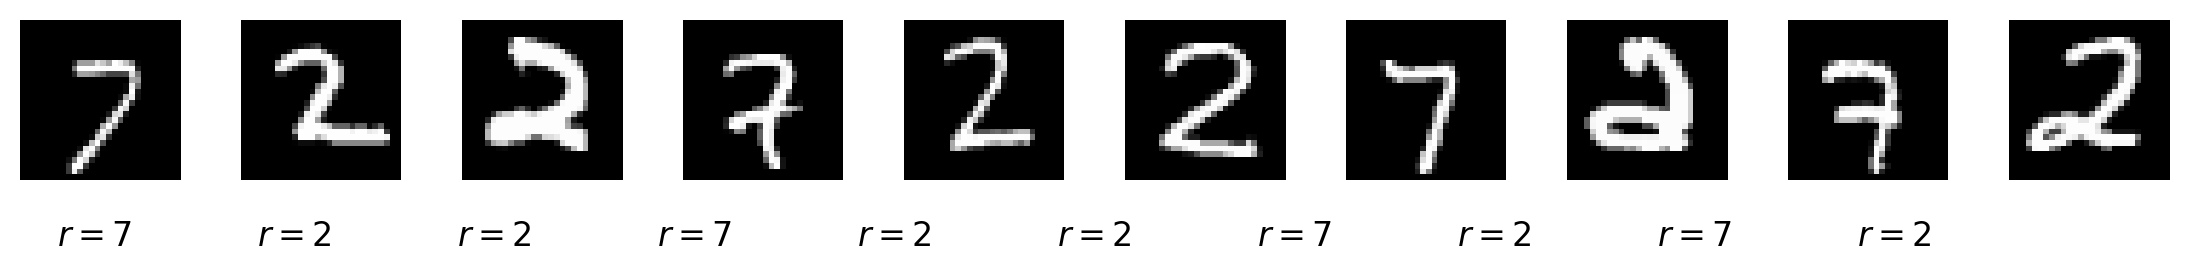

$r$ (classe),$k$ (caracteristique)
7,18.41
2,33.89
2,53.36
7,27.07
2,25.91
2,37.33
7,20.84
2,57.76
7,28.64
2,44.79


In [9]:
affichage_dix_caracteristique()

In [10]:
r_petite_caracteristique = 7
r_grande_caracteristique = 2

On détermine à présent le seuil $x$. C'est-à-dire à partir de quelle valeur de la caractéristique l'algorithme répondra 2.

In [11]:
x = 25

A partir des deux fonctions précédentes, on code la fonction classification.

In [12]:
def classification (k, x):
    if k < x:
        return r_petite_caracteristique
    else:
        return r_grande_caracteristique

L'algorithme est maintenant complet. Nous sommes capable de calculer une caractéristique à partir de l'image, puis décider si l'image représente un 2 ou 7 en regardant cette caractéristique.

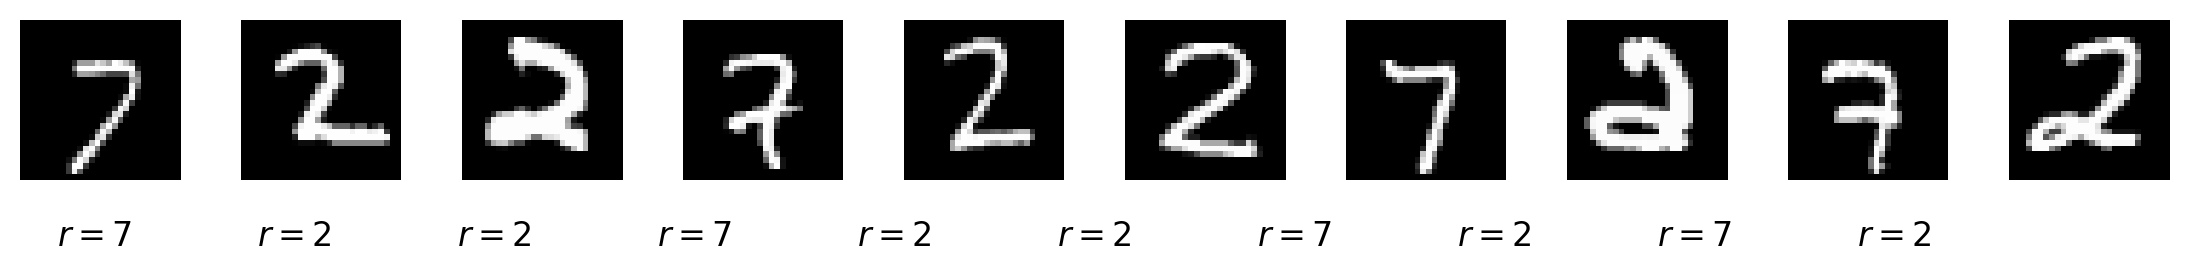

$r$ (classe),$k$ (caracteristique),$\hat{r}$ (prediction)
7,18.41,?
2,33.89,?
2,53.36,?
7,27.07,?
2,25.91,?
2,37.33,?
7,20.84,?
2,57.76,?
7,28.64,?
2,44.79,?


In [13]:
affichage_dix_caracteristique(True)

## 3. Calcul de l'erreur d'entraînement pour ce paramètre

Nous allons mainteant calculer notre pourcentage d'erreur. On applique l'algo ci-dessus sur toutes les images.
Une image mal classé est une image pour laquelle l'algorithme a donné une prédiction différente de la classe de l'image :
$$ \hat{r} \neq r $$

On note $f(x)$ l'erreur d'entrainement : le pourcentage d'image mal classées par l'algorithme sur les images d'entraînement. Cette valeur est donc donnée par :
$$f(x) = \frac{\text{Nombre d'images d'entraînement mal classées}} {\text{Nombre total d'images d'entraînement}} \times 100$$  


On rappel qu'il est possible de calculer notre erreur car nous connaissons la vraie classe pour les images (2 ou 7). L'ensemble de ces images est appelé ensemble d'entraînement. Il permet de construire et optimiser notre algorithme. Cet algorithme peut ensuite être utilisé sur de nouvelles images pour lesquelles on ne connaît pas la classe.

In [14]:
r_train[:10,]

array([7, 2, 2, 7, 2, 2, 7, 2, 7, 2])

In [15]:
e_train_10 = 20
validation_question_8()

Bravo, ton algorithme actuel a fait 2 erreurs sur les 10 premières images, soit 20% d'erreur


True

In [17]:
# Notre pourcentage d'erreur avec la caracteristique et le seuil choisi avec l'erreur_train()
e_train = erreur_train(d_train, r_train, x, classification, caracteristique)
print("\n \n --> Erreur d'entraînement =", f"{100*e_train:.2f}% \n \n")
validation_execution_5()


 
 --> Erreur d'entraînement = 38.60% 
 



True

## 4. Optimisation du seuil $x$

Le seuil définit précédemment à été choisi sur les 10 premières images. Il n'est donc pas optimal, alors que l'ensemble d'entraînement en contient plus de 12 000.

Afin de trouver le meilleur seuil $x$, on peut caclculer le taux d'erreur pour plusieurs seuils différents. On prendra celui qui donne la plus petite erreur.
Cela revient à tracer la fonction $f(x)$ pour trouver son minimum.

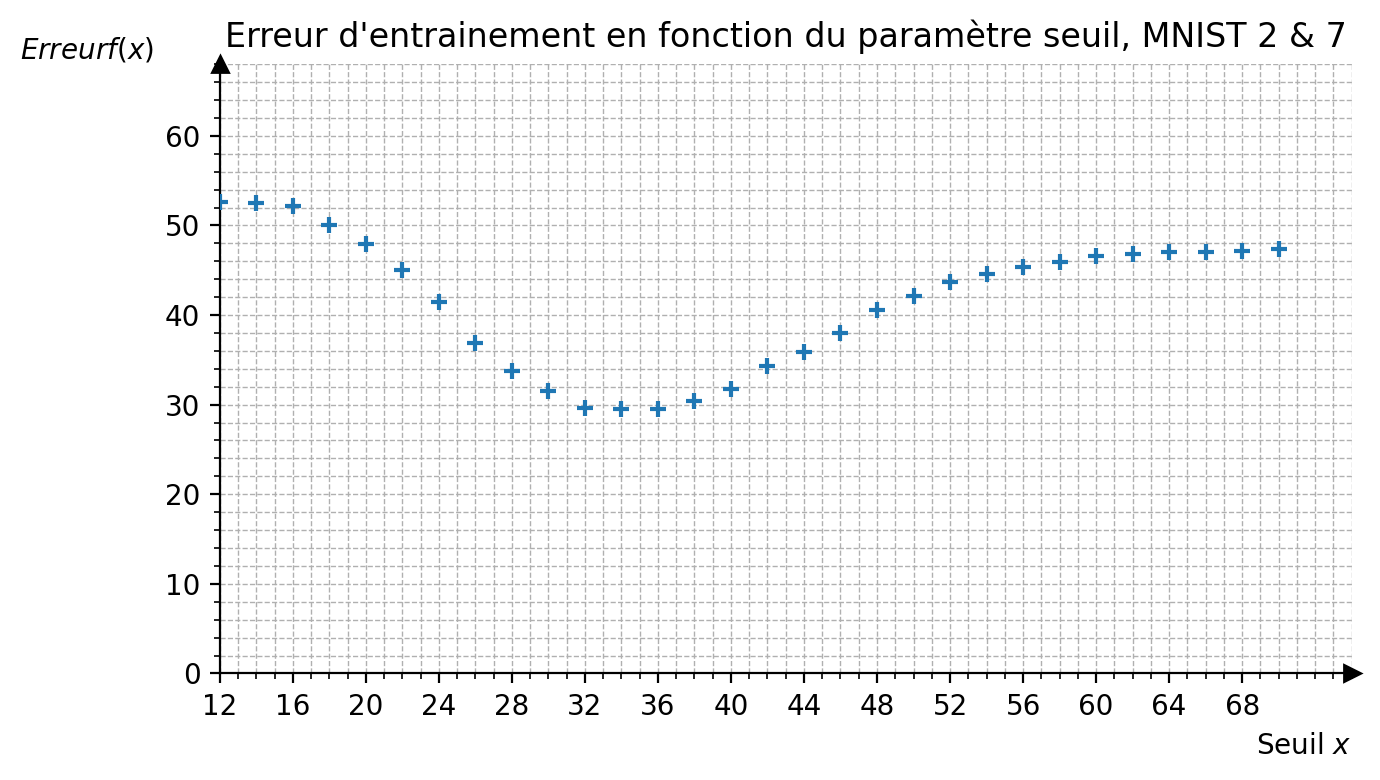

True

In [18]:
tracer_erreur(classification, caracteristique)
validation_execution_6()

In [23]:
x = 32
# Calcul de l'erreur d'entrainement avec ce nouveau seuil :  
e_train = erreur_train(d_train, r_train, x, classification, caracteristique)
print("\n \n --> Erreur d'entraînement =", f"{100*e_train:.2f}% \n \n")


 
 --> Erreur d'entraînement = 30.86% 
 



## 5. Amélioration de la caractéristique